In [47]:
import warnings
warnings.filterwarnings('ignore')


In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data,
    iris_data.target,
    test_size=0.2,
    random_state=11
)

# 결정 트리 모델 생성

In [49]:
from sklearn.tree import DecisionTreeClassifier  # ctrl+space하면 함수쉽게찾을수있웅

# DecisionTreeClassifier 객체 생성
dt_clf  = DecisionTreeClassifier(random_state=15)

# 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=15)

# Graphviz 시각화
- tree가 학습한 내용을 시각화 해주는 툴

In [50]:
from sklearn.tree import export_graphviz

export_graphviz(
    dt_clf, # 시각화 대상 모델
    out_file="tree.dot", # 시각화 결과물이 파일로 저장되기때문에 경로로 불러오기
    class_names = iris_data.target_names, # 각 클래스의 문자열 이름
    feature_names = iris_data.feature_names, # 각 feature의 이름
    impurity = True,
    filled=True # 스타일링
)

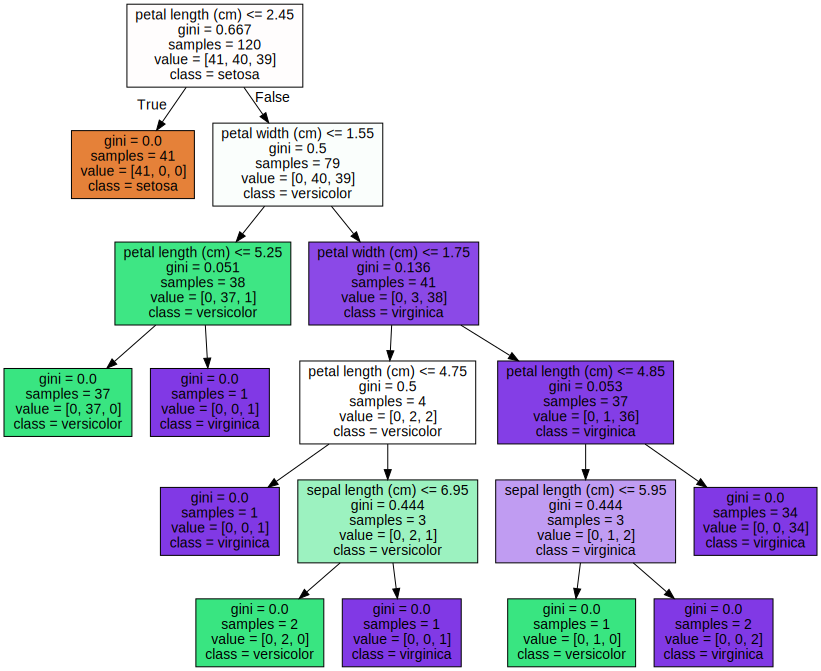

In [51]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

# 훈련데이터만 연관있는결과. TEST데이터는 아직 1도 연관 없음

# 정확도 확인

In [52]:
from sklearn.metrics import accuracy_score

train_pred = dt_clf.predict(X_train)
test_pred = dt_clf.predict(X_test)

print("훈련 세트 점수 : {:.3f}".format(accuracy_score(y_train,train_pred )))
print("테스트 세트 점수 : {:.3f}".format(accuracy_score(y_test,test_pred )))

# randomstate바꾸면 값달라짐

훈련 세트 점수 : 1.000
테스트 세트 점수 : 0.867


기본적인 의사결정나무 모델은 훈련데이터에 항상 과적합이 되어있다.
- 모든 말단 노드를 순수노드로 만들기 때문. 완벽하게 싹다분류해버림
- 훈련받은데이터는 기가막히가 다맞춤, 대신 새로보는데이턴느 못맞춤

# 트리모델의 과적합 제어(복잡도 제어)

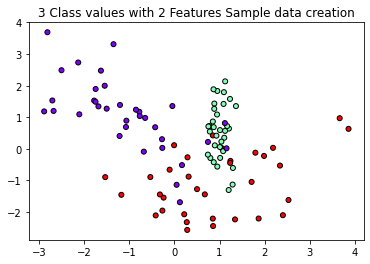

In [53]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=0
)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(
    X_features[:, 0],
    X_features[:, 1],
    marker='o',
    c=y_labels,
    s=25,
    cmap='rainbow',
    edgecolor='k'
)
plt.show()

In [54]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

# 기본 결정트리 확인. 아무런 하이퍼파라미터설정안하고만든거

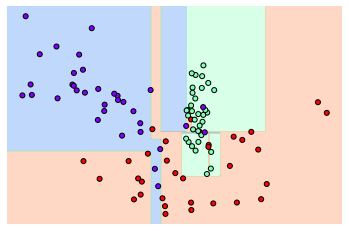

In [55]:
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier 객체 생성
dt_clf  = DecisionTreeClassifier(random_state=42)

# 학습
dt_clf.fit(X_features, y_labels)

visualize_boundary(dt_clf,X_features, y_labels)

# 정말 복잡하게 시시콜콜한 것들까지 분류했군..

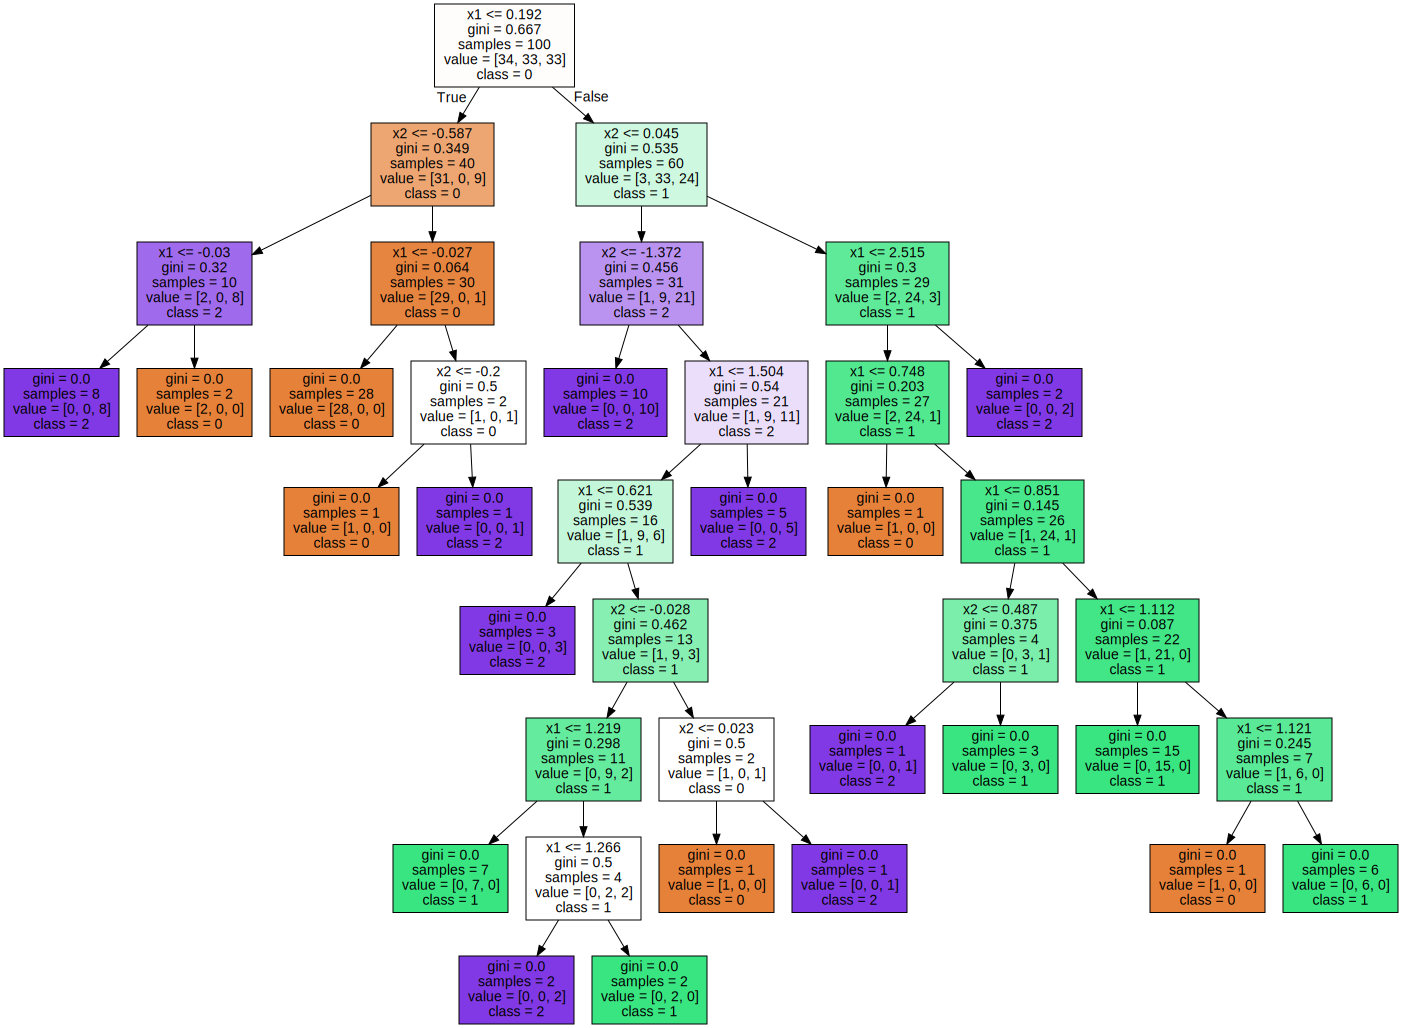

In [56]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 정말 복잡하게 시시콜콜한 것들까지 분류했군..

하이퍼 파라미터써서 복잡도 낮춰보자!

## min_samples_split


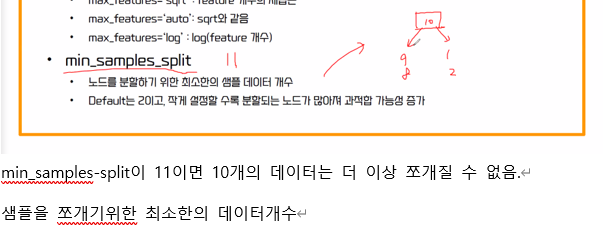



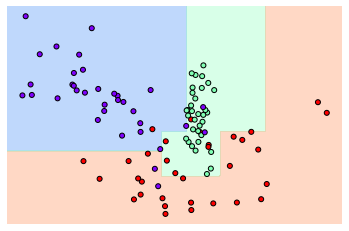

In [57]:
# min_samples_split=20으로만들어서 20개밑이면 분할 더이상 안되게하자!

dt_clf = DecisionTreeClassifier(random_state=42, min_samples_split=20).fit(X_features, y_labels)
visualize_boundary(dt_clf,X_features, y_labels)

# 나름 단순하게 분류됐다!!

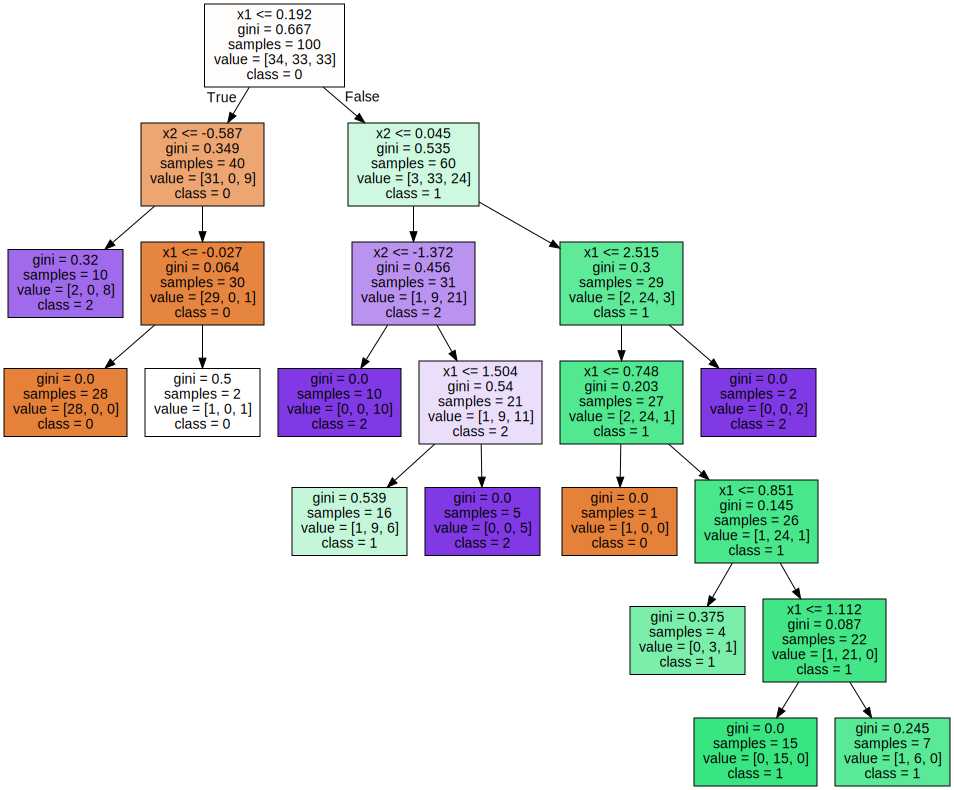

In [58]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## min_samples_leaf

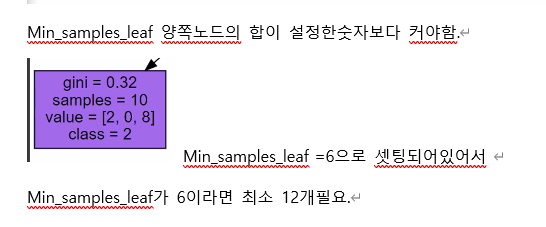

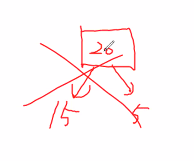

주의! 12개가넘어도 15:5로 분류되는경우에는 분류안됨. 6개는 넘어야

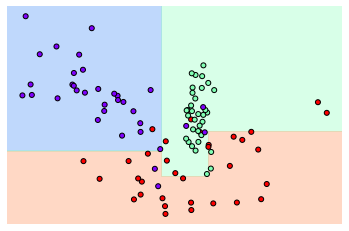

In [59]:

dt_clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf,X_features, y_labels)


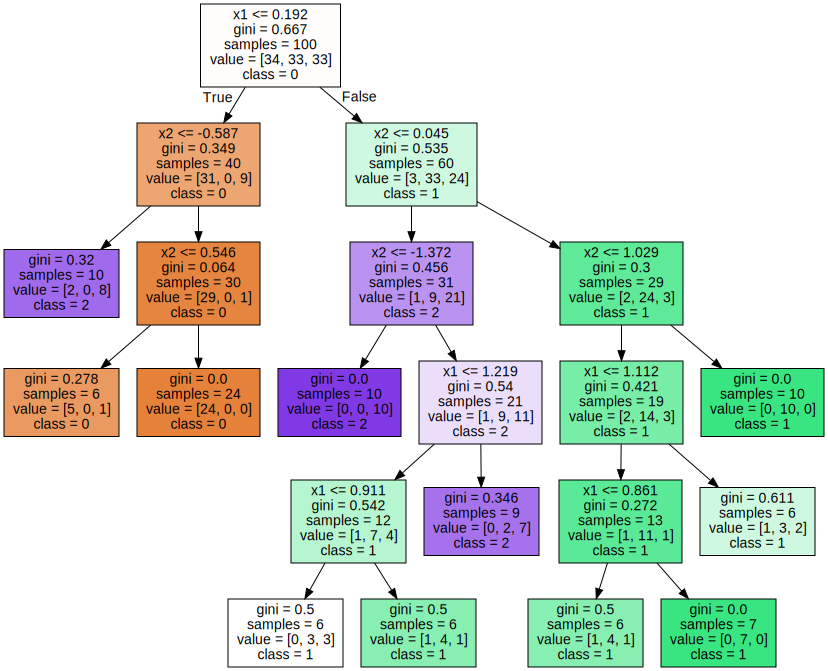

In [60]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## max_depth⭐

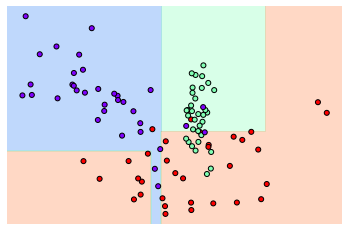

In [61]:

dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3).fit(X_features, y_labels)
visualize_boundary(dt_clf,X_features, y_labels)


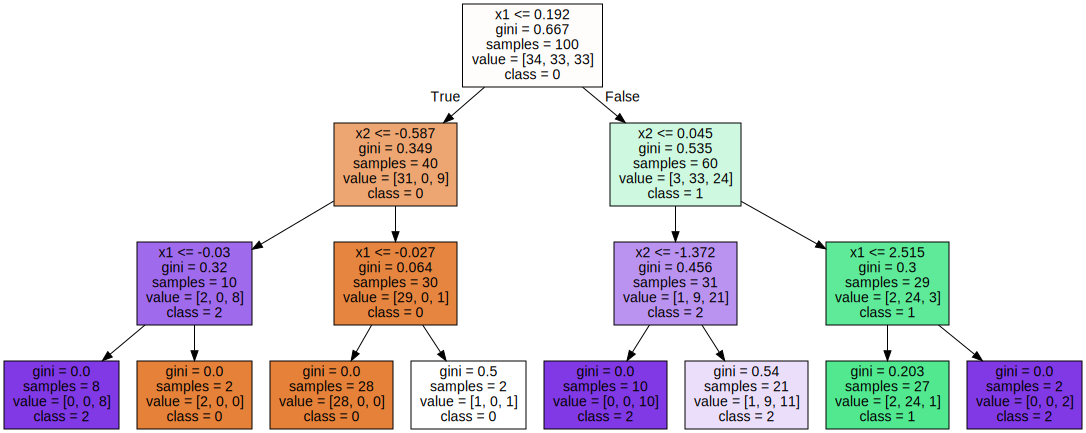

In [62]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 특성중요도 feature_importances_


In [63]:
# 맨위에서만든 iris모델 사용하자!
dt_clf_iris = DecisionTreeClassifier(random_state=11).fit(X_train, y_train)
dt_clf_iris.feature_importances_
# 다더하면 1😁

array([0.02500521, 0.        , 0.04867657, 0.92631822])

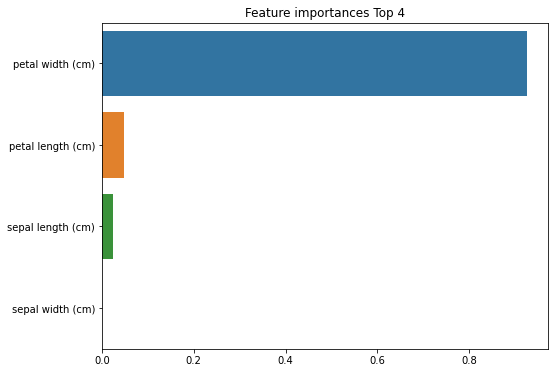

In [64]:
import pandas as pd
def plot_feature_importance(model, columns, limit=None):
  import seaborn as sns

  ftr_importances_values = model.feature_importances_
  # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  # 중요도값 순으로 Series를 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()

plot_feature_importance(dt_clf_iris, iris_data.feature_names)

# petal width만 가지고도 얼추 대강 분류할수있다!

# 사용자 행동 인식 모델

In [73]:
DATA_PATH = "/content/drive/MyDrive/멀티캠퍼스 9회차 I반/06머신러닝/human_activity/human_activity"

FEATURE_NAME_PATH = DATA_PATH  + "/features.txt"
TRAIN_FEATURE_PATH =  DATA_PATH + "/train/X_train.txt"
TRAIN_LABEL_PATH = DATA_PATH + "/train/y_train.txt"

TEST_FEATURE_PATH = DATA_PATH + "/test/X_test.txt"
TEST_LABEL_PATH = DATA_PATH + "/test/y_test.txt"

In [74]:
import pandas as pd

def get_human_dataset( ):

    def get_new_feature_name_df(old_feature_name_df):
      feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
      feature_dup_df = feature_dup_df.reset_index()
      new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
      new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0],  axis=1)
      new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
      return new_feature_name_df

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv(FEATURE_NAME_PATH, sep='\s+', header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv(TRAIN_FEATURE_PATH,sep='\s+', names=feature_name )
    X_test = pd.read_csv(TEST_FEATURE_PATH,sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv(TRAIN_LABEL_PATH,sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv(TEST_LABEL_PATH,sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [75]:
X_train.shape, y_train.shape

((7352, 561), (7352, 1))

In [76]:
X_test.shape, y_test.shape

((2947, 561), (2947, 1))

In [78]:
# action 컬럼이 label

target_counts = y_train["action"].value_counts()
target_counts

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

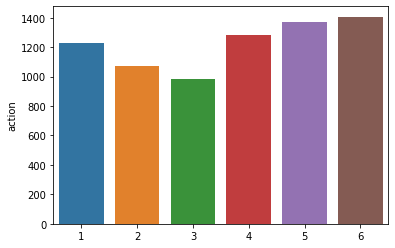

In [79]:
import seaborn as sns

sns.barplot(x=target_counts.index, y=target_counts)
plt.show()

# 적당한 비율로 잘 있군

# 모델생성

In [81]:
dt_human_clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [82]:
train_score = dt_human_clf.score(X_train, y_train) # X_train을 이용해서 예측하고 accuracy_score이용해서 점수까지 확인
test_score = dt_human_clf.score(X_test, y_test)
# predict하고 accuracy_score한거랑 똑같음 한번에 해주는거 .score

print("훈련 데이터 세트 점수 : {:.3f}".format(train_score)) # 과대적합되어있다!
print("테스트 데이터 세트 점수 : {:.3f}".format(test_score))

훈련 데이터 세트 점수 : 1.000
테스트 데이터 세트 점수 : 0.862


# 교차검증 해보기!

In [109]:
# cv=5 인상태로 교차검증해보기
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
  DecisionTreeClassifier(random_state=42),
  X_train,
  y_train,
  scoring='accuracy',
  cv=5
)

# 교차 검증별 정확도 및 평균 정확도 계산 

print('교차검증 결과 : {}'.format(scores))
print("교차검증 결과들 평균 : {}".format(scores.mean()))


교차검증 결과 : [0.80897349 0.81985044 0.84829932 0.87823129 0.88163265]
교차검증 결과들 평균 : 0.8473974389211836


# 그리드서치 수행

In [92]:
# 폴드를 5로 설정해서 그리드서치 수행

params = {
    'max_depth' : [8, 12, 16 ,20], 
    'min_samples_split' : [16, 24],
}

In [97]:
from sklearn.model_selection import GridSearchCV

grid_dt_clf = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid = params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_dt_clf.fit(X_train, y_train)

pd.DataFrame(grid_dt_clf.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.291871,0.543902,0.012527,0.000535,8,16,"{'max_depth': 8, 'min_samples_split': 16}",0.802855,0.830727,0.858503,0.866667,0.889796,0.849710,0.030091,3
1,3.845754,0.107857,0.012851,0.001059,8,24,"{'max_depth': 8, 'min_samples_split': 24}",0.817131,0.830727,0.847619,0.869388,0.889796,0.850932,0.026126,1
2,5.247950,0.593670,0.012668,0.001420,12,16,"{'max_depth': 12, 'min_samples_split': 16}",0.787220,0.811693,0.843537,0.872109,0.893197,0.841551,0.038597,8
3,6.282563,1.025111,0.011691,0.000502,12,24,"{'max_depth': 12, 'min_samples_split': 24}",0.791298,0.821210,0.852381,0.876871,0.881633,0.844679,0.034239,7
4,5.694400,0.393478,0.012506,0.000750,16,16,"{'max_depth': 16, 'min_samples_split': 16}",0.796737,0.815772,0.845578,0.883673,0.897959,0.847944,0.038577,4
5,5.683771,0.399986,0.012540,0.000807,16,24,"{'max_depth': 16, 'min_samples_split': 24}",0.802855,0.823249,0.857823,0.876190,0.893197,0.850663,0.033314,2
6,5.667766,0.517176,0.012519,0.001917,20,16,"{'max_depth': 20, 'min_samples_split': 16}",0.796057,0.815772,0.845578,0.883673,0.897279,0.847672,0.038583,5
7,5.560683,0.496242,0.012038,0.001393,20,24,"{'max_depth': 20, 'min_samples_split': 24}",0.797417,0.823249,0.857823,0.876190,0.881633,0.847262,0.032221,6


In [110]:
cv_results_df = pd.DataFrame(grid_dt_clf.cv_results_)

# max_depth, min_samples_split 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'param_min_samples_split', 'mean_test_score']]

,param_max_depth,param_min_samples_split,mean_test_score
0,8,16,0.849710
1,8,24,0.850932
2,12,16,0.841551
3,12,24,0.844679
4,16,16,0.847944
5,16,24,0.850663
6,20,16,0.847672
7,20,24,0.847262


In [112]:
print("GridSearchCV 최고 평균 정확도 : {:.4f}".format(grid_dt_clf.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터 : {}".format(grid_dt_clf.best_params_))

GridSearchCV 최고 평균 정확도 : 0.8509
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 24}


# 특성 중요도 확인

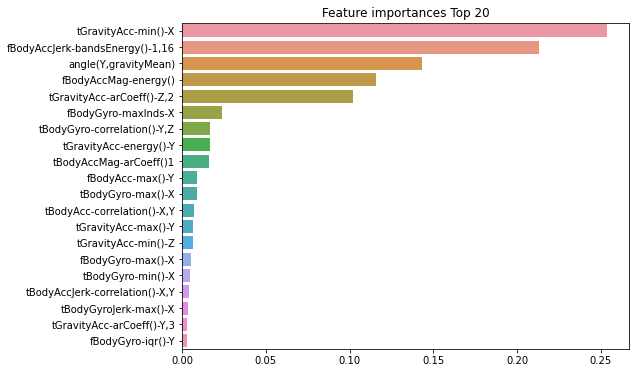

In [114]:
best_tree = grid_dt_clf.best_estimator_
plot_feature_importance(best_tree, X_train.columns, 20)

# 테스트 세트 평가

In [115]:
best_tree.score(X_test, y_test)

0.8686800135731252

In [116]:
best_tree.score(X_train, y_train)
# 아직도 과대적합상태

0.970620239390642